# Qiskit Workshop at KAUST 04/12/2025

## Delivered by Ahmed Al-Qatatsheh. 

In [1]:
import numpy as np
from qiskit import QuantumCircuit

# 1. A quantum circuit for preparing the quantum state |000> + i |111> / √2
qc = QuantumCircuit(3)
qc.h(0)             # generate superposition
qc.p(np.pi / 2, 0)  # add quantum phase
qc.cx(0, 1)         # 0th-qubit-Controlled-NOT gate on 1st qubit
qc.cx(0, 2)         # 0th-qubit-Controlled-NOT gate on 2nd qubit

In [2]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using the Sampler primitive
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
print(f" > Counts: {result[0].data['meas'].get_counts()}")

 > Counts: {'000': 509, '111': 491}


In [3]:
# 2. Define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()
job = estimator.run([(qc, operator)], precision=1e-3)
result = job.result()
print(f" > Expectation values: {result[0].data.evs}")

 > Expectation values: 3.9983299865224327


In [4]:
from qiskit import transpile
from qiskit.transpiler import Target, CouplingMap
target = Target.from_configuration(
    basis_gates=["cz", "sx", "rz"],
    coupling_map=CouplingMap.from_line(3),
)
qc_transpiled = transpile(qc, target=target)

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

In [6]:
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


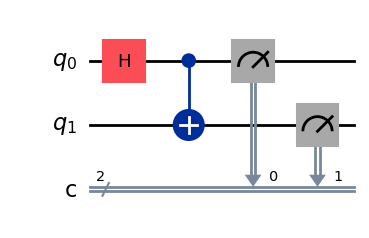

In [7]:
circuit.draw(output="mpl")

Measurement outcomes: {'11': 4964, '00': 5036}


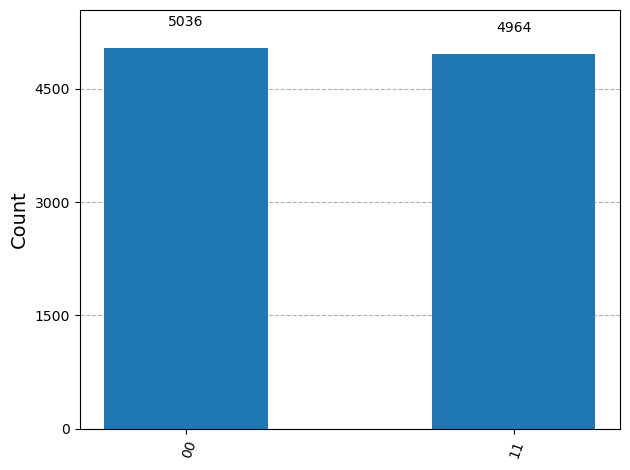

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a simulator backend
simulator = AerSimulator()

# Run the circuit with 1024 shots (repeated measurements)
job = simulator.run(circuit, shots=1024)
result = job.result()

# Get the measurement counts
counts = result.get_counts(circuit)
print("Measurement outcomes:", counts)

# Visualise as a histogram
plot_histogram(counts)

# Quick Start Code

{'00': 49776, '11': 50224}


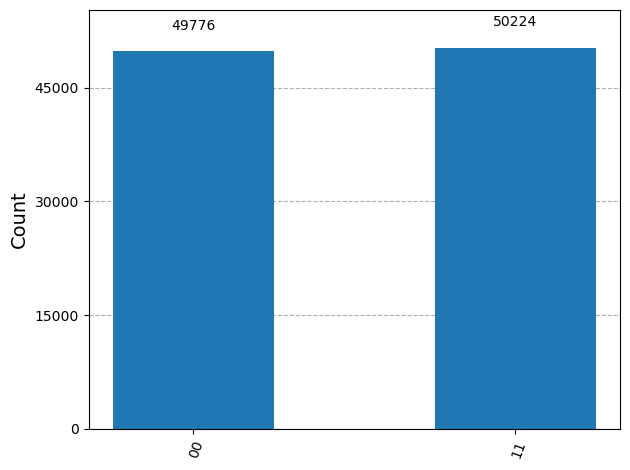

In [18]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
sampler = StatevectorSampler()
result = sampler.run([qc], shots=100000).result()
print(result[0].data.meas.get_counts())

counts = result[0].data.meas.get_counts()
plot_histogram(counts)